## Phase 1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Header
#### Course Name: Data Intensive Computing
#### phase #: 1
#### term project name: **Spotify API: Is it the Key to Commercial Success?**

### Q Write down the following information: 
#### 1. Identify problems prevalent in public application domains. The issue(s) you are trying to address: This will be a 100-word abstract in the form of a problem statement.: 

**Context:** Spotify is one of the world's most popular music streaming services. It's home to 50 million songs, with tens of thousands more added every day. For artists in this age, it is critical that they host their music on the platform. The listener count on a track is highly indicative of a commercially successful piece of music. Spotify has its own curated playlists (assembled by genre and music experts) that are advertised to all users. This promotion drives listens, leading to an increase in exposure and revenue for artists/labels whose music is featured on one of these coveted playlists. 

**API:** Spotify's API allows for anyone to extract information about Spotify's uploads. Many interesting features that are produced by their proprietary track analysis are available to the public.

**Project:** This project takes tracks from the top 150 curated playlists posted by Spotify's own account, using their API, to begin to understand what makes a track worthy of promotion by the very platform it is hosted on. What makes a track "good" enough to be backed by genre experts and put in a position to reach many new sets of fresh ears?

* What are the commonalities between listed tracks? 

* What kind of tracks are rated more "popular" and what other features are correlated with popularity? 

* What can artists/labels take away from the available data to give themselves a competing edge on getting listed by a curator?

* Is it possible to predict the optimal track features for commercial success?

#### 2. Name of your data: 'spotifytop150Playlists.csv'

#### 3. Background:
   + Source: https://developer.spotify.com/documentation/web-api/
   + Time Period: Extracted and compiled on the night of February 11th, 2021
   + Scope (if there is please specified): 150 out of 1,530 public playlists posted by https://open.spotify.com/user/spotify 
   + Data Unit: Spotify Tracks
   + Other: 

#### 4 Introduction of dataset
Answer 2 questions:
+ How many columns? Show all the column labels. ((You can use pandas.DataFrame.columns to easily show all the labels of columns.)

* * There are 16 initial columns

+ What are they refering to respectively? please write in table form (markdown syntax for drawing tables : [markdown tutorial with examples](https://guides.github.com/features/mastering-markdown/))

Feature | Description
------------ | -------------
i | Index of track upon extraction.
name | Name of the track.
album | Name of the album the track belongs to.
artist | Now of the artist the track belongs to.
release_date | Date the track was uploaded.
length | Track duration in ms.
popularity | Based on total number of plays compared to other tracks as well as how recent those plays are 0 is low, 100 is high.
valence | A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
danceability | Describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
acousticness | A measure from 0.0 to 1.0 how acoustic the track is.
energy | A measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.
instrumentalness | Predicts whether a track contains no vocals. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content.
liveness | Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.
loudness | The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track. Values typical range between -60 and 0 db.
speechiness | Detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value.
key | The key the track is in. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.
tempo | The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
mode | Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.







#### 5 Hypothesis and conclusion
 What hypothesis or conclusion do you want to study from the data?  (Remember this relative to your future phases of task)

Hypothesis: 

* Different features will correlate with relative release date. For example, Summer time (May-Aug) releases with high popularity in the 21st Century may exhibit higher danceability because it is a more active season.

* The time of a release will be as important as any other feature in determining success.
Certain popular tracks combinations of features will reveal a 'formula' that musicians can apply when assessing the commercial potential of a track.

* Popularity will reveal the most successful audio-feature ratios (Danceability:Energy:Instrumentalness:etc.)


* Post-COVID 19 Pandemic releases may exhibit different patterns because the artist is less incentivized to sell concert tickets. We will assess our findings with this in mind, if patterns do change around the beginning of lockdowns.


#### 6 Write codes to load the data 
(recommend: pandas package: 10 mins tutorial: [10 mins tutorial](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html#min) )

In [ ]:
# code
# load the data
import pandas as pd
import numpy as np

df = pd.read_csv('drive/My Drive/Ping_marksiga_xianxinl/data/newspotify150Playlists.csv')
#df=pd.read_csv('newspotify150Playlists.csv')
print(df.columns)

Index(['Unnamed: 0', 'name', 'album', 'artist', 'release_date', 'length',
       'popularity', 'valence', 'danceability', 'acousticness', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'key',
       'tempo', 'time_signature', 'mode'],
      dtype='object')


#### 7 IDA (Initial Data Analysis) 
[reference to do IDA](https://www.sciencedirect.com/science/article/pii/S0022522315017948)  \\
Please specify what you've done (text and code) for each operation (at least 10 operations). If some steps will produce a picture, please show this picture


##### 1

In [ ]:
# code
# DELETE COLUMNS
# Here we delete the columns, i (first column of numbers is not data, just index) and time_signature.
# We remove the time_signature column because music is generally written in 4/4 time. We won't analyze using this column because it isn't important nor diverse as the other features in this set.

df1 = df.drop(columns=['Unnamed: 0','time_signature'])

print(df1.columns)

# output: df1

Index(['name', 'album', 'artist', 'release_date', 'length', 'popularity',
       'valence', 'danceability', 'acousticness', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'key', 'tempo', 'mode'],
      dtype='object')


#### 2

In [ ]:
# code
# Delete NA rows. Upon extraction from Spotify API, some entries introduced Type Errors. Those entries were replaced with NA so that we may see how many rows are affected upon filtering in this section (4 rows).

df2 = df1.dropna()

print('dropped ' + str(len(df1) - len(df2)) + ' rows')

print(str(len(df2)) + ' rows left')

# output: df2

dropped 5 rows
11281 rows left


#### 3

In [ ]:
# code
# Delete rows with 0 popularity because they may not be useful. This is a known bug in the API when popularity is 0. We want only tracks with popularity that don't have 0 because we need to use the popularity score in our analysis.

df3 = df2[(df2['popularity'] != 0)]

print('dropped ' + str(len(df2) - len(df3)) + ' rows')

print(str(len(df3)) + ' rows left')

# output: df3

dropped 1590 rows
9691 rows left


#### 4

In [ ]:
# code
# Convert release_date to some appropriate timedate library format.
# Convert release_dates with only the year (ex: 1993) to the first day of the year using the appropriate timedate format (ex: 01/01/1993 or 01-01-1993).
df3['release_date'] = df3['release_date'].astype('datetime64[D]') # D signifies Day-precision as opposed to Hourly or Monthly.
df4 = df3
df4
# output: df4

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


name  ... mode
3                                        Save Your Tears  ...  1.0
4                                             We're Good  ...  1.0
6                                 Astronaut In The Ocean  ...  0.0
7                                     Goosebumps - Remix  ...  1.0
8                                             Heat Waves  ...  1.0
...                                                  ...  ...  ...
11281  Symphony No. 1 in G Minor, Op. 13, TH 24 "Wint...  ...  0.0
11282  The Snow Maiden, Op. 12: II. Dance and Chorus ...  ...  1.0
11283  The Seasons, Op. 37a, TH 135: II. February: Ca...  ...  0.0
11284  Manfred Symphony in B Minor, Op. 58, TH 28: I....  ...  0.0
11285  Tchaikovsky: Symphony No. 1 in G Minor, Op. 13...  ...  0.0

[9691 rows x 17 columns]

#### 5

In [ ]:
# code
# Based on the defintion of instrumentalness in the Spotify API Documenation, we set 1 (more instrumental contents) if the score >= 0.5 and 0 (more vocal contents) otherwise.
# This gives us a more useful format to work with.
df4['instrumentalness'] = np.where(df4['instrumentalness'] >=0.5, 1, 0)

df5 = df4
df5
# output: df5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


name  ... mode
3                                        Save Your Tears  ...  1.0
4                                             We're Good  ...  1.0
6                                 Astronaut In The Ocean  ...  0.0
7                                     Goosebumps - Remix  ...  1.0
8                                             Heat Waves  ...  1.0
...                                                  ...  ...  ...
11281  Symphony No. 1 in G Minor, Op. 13, TH 24 "Wint...  ...  0.0
11282  The Snow Maiden, Op. 12: II. Dance and Chorus ...  ...  1.0
11283  The Seasons, Op. 37a, TH 135: II. February: Ca...  ...  0.0
11284  Manfred Symphony in B Minor, Op. 58, TH 28: I....  ...  0.0
11285  Tchaikovsky: Symphony No. 1 in G Minor, Op. 13...  ...  0.0

[9691 rows x 17 columns]

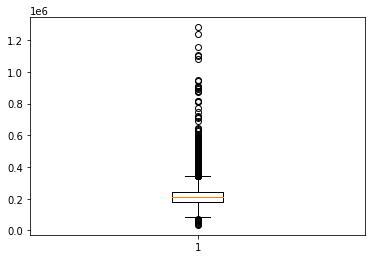

221503.973686926


123.5320174388611


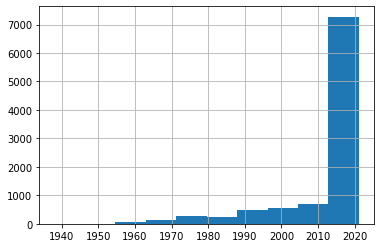

In [ ]:
# code (No Operations Are Performed Here)
# Outlier Exploration

import matplotlib.pyplot as plt
# length

plt.boxplot(df5['length'])
plt.show()

print(df5['length'].mean())
# Average is about 3-4min. 
# Everything above 1e6*.6 is over 10 minutes long. We remove these in the final step.
# We will also remove tracks that aren't even 1 minute long.


# tempo
plt.boxplot(df5['tempo'])
plt.show()

print(df5['tempo'].mean())
# Average is about 123 BPM.
# We will remove everything above 200 BPM and under 50 BPM.

df5['release_date'].hist()
# We will remove everything after listed after 2021 because it isn't real.
# We will remove everything before 2010 as well so that our analysis is more relevant to the sphere of music being released today.


#### 6

In [ ]:
# code
# Convert length from ms to min:sec format (ex: 03:35 for Save Your Tears)
import datetime

#df5['length'] = pd.to_datetime(df['length'], unit='ms').dt.strftime('%M:%S')

#NEW: Round nearest second
df5['length'] = df5['length'].astype(int)


df6 = df5
df6
# output: df6

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


name  ... mode
3                                        Save Your Tears  ...  1.0
4                                             We're Good  ...  1.0
6                                 Astronaut In The Ocean  ...  0.0
7                                     Goosebumps - Remix  ...  1.0
8                                             Heat Waves  ...  1.0
...                                                  ...  ...  ...
11281  Symphony No. 1 in G Minor, Op. 13, TH 24 "Wint...  ...  0.0
11282  The Snow Maiden, Op. 12: II. Dance and Chorus ...  ...  1.0
11283  The Seasons, Op. 37a, TH 135: II. February: Ca...  ...  0.0
11284  Manfred Symphony in B Minor, Op. 58, TH 28: I....  ...  0.0
11285  Tchaikovsky: Symphony No. 1 in G Minor, Op. 13...  ...  0.0

[9691 rows x 17 columns]

#### 7

In [ ]:
# code
# Search for and delete duplicate tracks in case they exist across several playlists (they often do get added to multiple playlists with similar genres).

df7 = df6.drop_duplicates(subset=['name', 'album', 'artist', 'release_date'], keep='first')

print('dropped ' + str(len(df6) - len(df7)) + ' rows')

print(str(len(df7)) + ' rows left')

# output: df7

dropped 1223 rows
8468 rows left


#### 8

In [ ]:
# code
# Round tempo to nearest integer BPM (0.0-0.1 BPM difference is very small and this will make our tempo data more uniform)
df8 = df7.round({'tempo': 0}) # round to nearest whole number

df8['tempo'] = df8['tempo'].astype(int) # convert tempo to int

print(df8['tempo'])

# Round loudness to nearest tenth for uniformity. DB differences to the hundreth are hardly perceivable.
df8['loudness'] = round(df8['loudness'],1)

print(df8['loudness'])
# output: df8

3        118
4        134
6        150
7        125
8         81
        ... 
11281    101
11282    127
11283    133
11284     82
11285    123
Name: tempo, Length: 8468, dtype: int64
3        -5.5
4        -5.9
6        -6.9
7        -7.8
8        -6.9
         ... 
11281   -27.6
11282   -25.3
11283   -24.8
11284   -20.4
11285   -16.2
Name: loudness, Length: 8468, dtype: float64


#### 9

In [ ]:
# code
# NEW COLUMN fromAlbum
# Create column fromAlbum: 1 (yes) / 0 (no) if name and album match or one contains the other (songname: Big Steppa (feat. Sada Baby) vs. albumname: Big Steppa would be a single). 1 means the track is in an album. 0 means the track is likely to be a single.

from difflib import SequenceMatcher
df8['fromAlbum'] = 0
set = []
for index, row in df8.iterrows():
  set.append(np.where(SequenceMatcher(None, row['name'], row['album']).ratio()> 0.7, 0, 1))

df8['fromAlbum'] = set
df9 = df8

df9
# output: df9

name  ... fromAlbum
3                                        Save Your Tears  ...         1
4                                             We're Good  ...         1
6                                 Astronaut In The Ocean  ...         0
7                                     Goosebumps - Remix  ...         0
8                                             Heat Waves  ...         1
...                                                  ...  ...       ...
11281  Symphony No. 1 in G Minor, Op. 13, TH 24 "Wint...  ...         1
11282  The Snow Maiden, Op. 12: II. Dance and Chorus ...  ...         1
11283  The Seasons, Op. 37a, TH 135: II. February: Ca...  ...         1
11284  Manfred Symphony in B Minor, Op. 58, TH 28: I....  ...         1
11285  Tchaikovsky: Symphony No. 1 in G Minor, Op. 13...  ...         1

[8468 rows x 18 columns]

#### 10

In [ ]:
# code
# Remove outliers based on earlier outlier exploration. The less outliers we have, the more value our analysis can provide.

# Ex: Track too long (10 min or more), track too short (1 min or less). 

df9 = df8[(df8['length'] <= 600000)]
df9 = df9[(df9['length'] >= 60000)]

print(str(len(df9)) + ' rows left after length')

df9 = df9[(df9['tempo'] <= 200)]
df9 = df9[(df9['tempo'] >= 50)]

print(str(len(df9)) + ' rows left after tempo')

df9 = df9[(df9['release_date'] > '2010-01-01')]
df9 = df9[(df9['release_date'] < '2022-01-01')]

print(str(len(df9)) + ' rows left after release_date')


df10 = df9
df10
print(str(len(df10)) + ' rows left')
# output: df10

8431 rows left after length
8391 rows left after tempo
6375 rows left after release_date
6375 rows left


#### 11

In [ ]:
# code (Removing specific rows based on manual observation and domain knowledge.)
# Remove the artist Pyotr Ilyich Tchaikovsky from the CSV because he is a 19th century composer and irrelevant to our problem.
# Remove Swan Lake for the same reason

df11 = df10[~df10['name'].str.contains('Tchaikovsky')]
df11 = df11[~df11['album'].str.contains('Tchaikovsky')]
df11 = df11[~df11['artist'].str.contains('Tchaikovsky')]
df11 = df11[~df11['name'].str.contains('Swan Lake')]
print(str(len(df11)) + ' rows left')

df11
# output: df11

6360 rows left


name  ... fromAlbum
3             Save Your Tears  ...         1
4                  We're Good  ...         1
6      Astronaut In The Ocean  ...         0
7          Goosebumps - Remix  ...         0
8                  Heat Waves  ...         1
...                       ...  ...       ...
11221            Time To Save  ...         1
11222          Champion Sound  ...         0
11223                  Iconic  ...         0
11224     The Moment (Novell)  ...         0
11225                 Duality  ...         0

[6360 rows x 18 columns]

In [ ]:
df11.to_csv("phase2spotify_cleaned.csv", sep = ',')